In [3]:
! pip install google_colab_shell
from google_colab_shell import getshell

  Preparing metadata (setup.py) ... done
  Created wheel for google_colab_shell: filename=google_colab_shell-0.2-py3-none-any.whl size=4107 sha256=fa4f46f7e59117a6bdc3a5d2ea279ec9f9b52980829ab5525648f0a0daffa25e
  Stored in directory: /root/.cache/pip/wheels/f9/36/65/95dd4599be065418a9fe1f482674c8e716ce540f3f484681d2
Successfully built google_colab_shell


In [4]:
getshell()

In [ ]:
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import userdata
ghtoken_moi = userdata.get('ghtoken')

In [ ]:
# initialize request parameters
#url = 'https://api.github.com/user'
url = 'https://api.github.com/search/repositories?q=Q'
headers = {'Authorization': 'Bearer ' + ghtoken_moi}

# send request to GitHub
r = requests.get(url, headers=headers)

# print initial responses
print(r.status_code)
print(r.text)

r_json = json.loads(r.text)
pprint(r_json)

200
{"login":"Martinmejia","id":37879216,"node_id":"MDQ6VXNlcjM3ODc5MjE2","avatar_url":"https://avatars.githubusercontent.com/u/37879216?v=4","gravatar_id":"","url":"https://api.github.com/users/Martinmejia","html_url":"https://github.com/Martinmejia","followers_url":"https://api.github.com/users/Martinmejia/followers","following_url":"https://api.github.com/users/Martinmejia/following{/other_user}","gists_url":"https://api.github.com/users/Martinmejia/gists{/gist_id}","starred_url":"https://api.github.com/users/Martinmejia/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/Martinmejia/subscriptions","organizations_url":"https://api.github.com/users/Martinmejia/orgs","repos_url":"https://api.github.com/users/Martinmejia/repos","events_url":"https://api.github.com/users/Martinmejia/events{/privacy}","received_events_url":"https://api.github.com/users/Martinmejia/received_events","type":"User","site_admin":false,"name":"Luis Martin","company":"University of Toronto

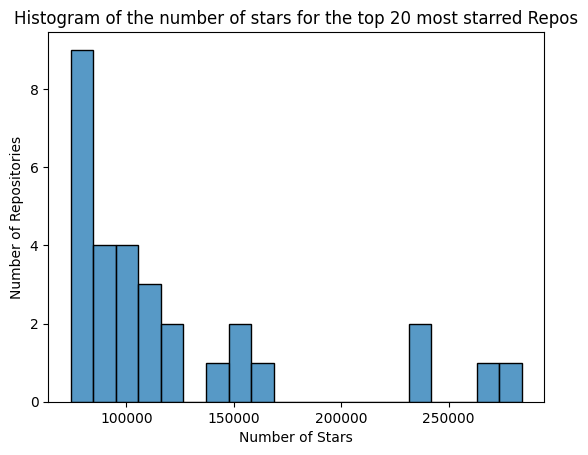

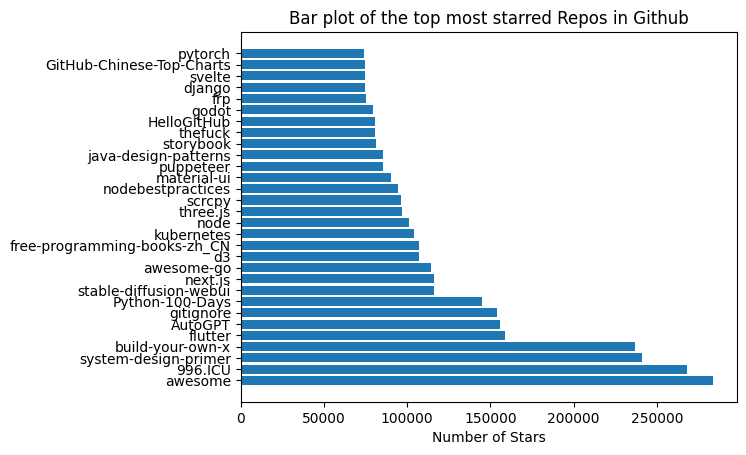

In [ ]:
# Function to retrieve the top 20 most starred repositories in GitHub
def get_top_starred_repos():
  # Define the URL for the GitHub API endpoint
  url = f"https://api.github.com/search/repositories?q=stars:%3E1&sort=stars"

  # Send a GET request to the API endpoint
  response = requests.get(url)

  # Check the status code of the response
  if response.status_code != 200:
    raise Exception(f"Error retrieving data from GitHub API: {response.status_code}")

  # Parse the JSON response
  data = json.loads(response.text)

  # Extract the repository names and star counts from the response
  repos = []
  for item in data["items"]:
    repos.append({"name": item["full_name"], "stars": item["stargazers_count"]})

  # Return the list of repositories
  return repos

# Function to plot the histogram of the number of stars
def plot_histogram(repos):
  # Extract the list of star counts
  stars = [repo["stars"] for repo in repos]

  # Create a histogram
  sns.histplot(stars, bins=20)
  plt.xlabel("Number of Stars")
  plt.ylabel("Number of Repositories")
  plt.title("Histogram of the number of stars for the top 20 most starred Repos")
  plt.show()

# Function to barplot the stars vs repo name
def bar_plot(repos):
  # Extract the list of star counts and names
  stars = [repo["stars"] for repo in repos]
  names = [repo["name"].split('/')[1] for repo in repos]

  # Create the horizontal barplot
  plt.barh(names, stars)
  plt.xlabel("Number of Stars")
  #plt.ylabel("Name of Repositories")
  plt.title("Bar plot of the top most starred Repos in Github")
  plt.show()

# Get the top 20 most starred Python repositories
#Python
repos = get_top_starred_repos()

# Plot the histogram of the number of stars
for i in [plot_histogram(repos), bar_plot(repos)]:
  i
# plot_histogram(repos)
# bar_plot(repos)

# Nueva sección